### 결과를 보여주기 위한 파일입니다.

In [67]:
import cv2
import random
def restore_x(x,img_shape):
    y_size,x_size = img_shape
    center_x,center_y = float(x[0]) * x_size ,float(x[1]) * y_size 
    width, height = float(x[2]) * x_size, float(x[3]) * y_size 
    
    return[center_x - width/2, center_y - height/2, center_x + width/2, center_y + height/2]

def plot_one_box(model,x, img, color=None, label=None, line_thickness=3):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    
    if model == 3:
        color = (0,0,255)
    elif model == 5:
        color = (0,255,0)
    elif model == 7:
        color = (255,0,0)
    else:
        color = (50,50,255)
        
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=1 / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, 1 / 3, [225, 255, 255], thickness=1, lineType=cv2.LINE_AA)



--------------------------------------------------------------------------------------------------------------------------------------
##### 원본이미지

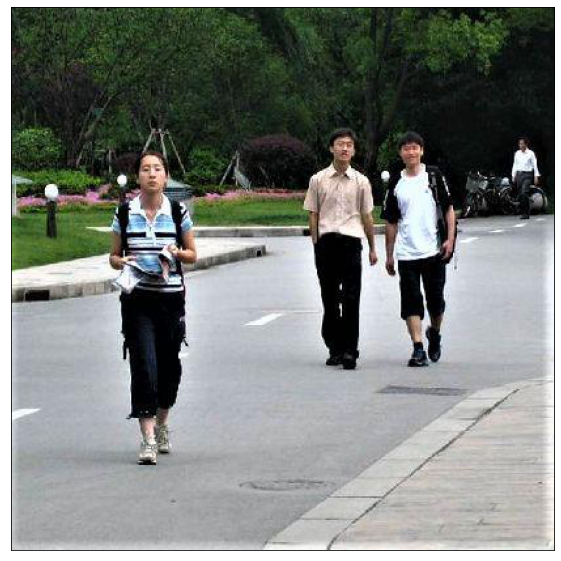

In [68]:
import matplotlib.pyplot as plt

frame = plt.imread('./test_img/test01.jpg')

plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.xticks([])
plt.yticks([])
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------
##### 모델 3개의 detect결과
- yolov3, yolov5, yolov7

In [69]:
class_name_array = open('./predefined/classes.txt').read().split()

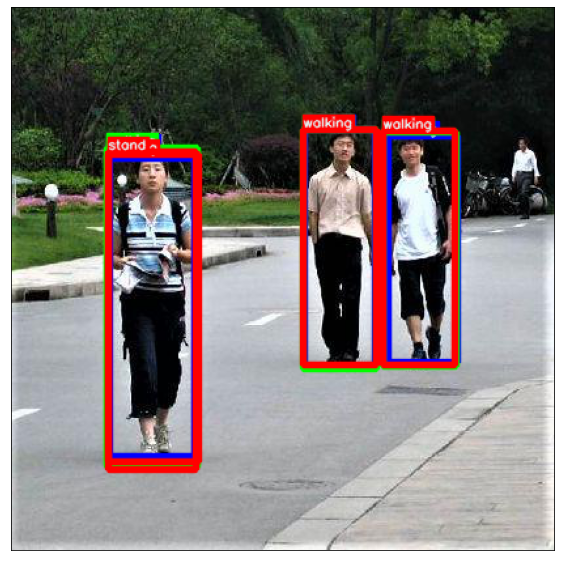

In [70]:
draw_img = frame.copy()
yolov3_txt = open('./data/labels/yolov3_detect/labels/test01.txt')
yolov5_txt = open('./data/labels/yolov5_detect/labels/test01.txt')
yolov7_txt = open('./data/labels/yolov7_detect/labels/test01.txt')

for model_n, f in [(3,yolov3_txt),(5,yolov5_txt),(7,yolov7_txt)]:
    for line in f.readlines():
    #plot BBox
        val = line.split()
        plot_one_box(model_n,restore_x(val[1:], draw_img.shape[:2]), draw_img, label=class_name_array[int(val[0])])
    f.close()
plt.figure(figsize=(10,10))
plt.imshow(draw_img)
plt.xticks([])
plt.yticks([])
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------
##### 모델 3개의 detect결과
- yolov3, yolov5, yolov7

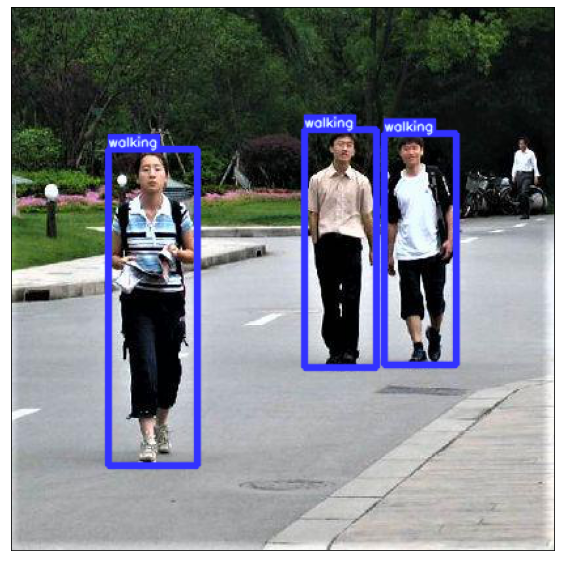

In [71]:
WBF_draw_img = frame.copy()
WBF_txt = open('./runs/result_2023_07_20_1220_39/test01.txt')


for line in WBF_txt.readlines():
#plot BBox
    val = line.split()
    plot_one_box(0,restore_x(val[1:], WBF_draw_img.shape[:2]), WBF_draw_img, label=class_name_array[int(val[0])])

plt.figure(figsize=(10,10))
plt.imshow(WBF_draw_img)
plt.xticks([])
plt.yticks([])
plt.show()